# 11. Обнаружение контуров

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def READ_RGB(path):
    image=cv2.imread(path)
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

def SHOW_IMAGE(image):
    plt.imshow(image,cmap='gray')
    plt.show()


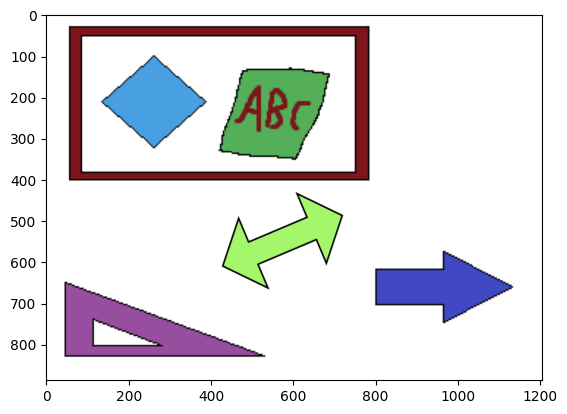

In [71]:
rgb_image=READ_RGB('nested-shapes.png')
SHOW_IMAGE(rgb_image)

In [72]:
def READ_GRAY(path):
    image=cv2.imread(path)
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


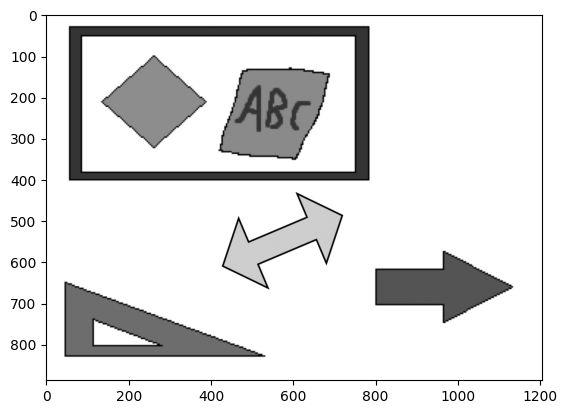

In [73]:
gray_image=READ_GRAY('nested-shapes.png')
SHOW_IMAGE(gray_image)

## Трешхолд

Бинаризация изображения: сравниваем интенсивность каждого пиксель с порогом (128). Возвращаем 255 если превышает и 0 в обратном случае
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="ORD">
    <mtext mathvariant="monospace">dst</mtext>
  </mrow>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">{</mo>
    <mtable columnalign="left left" columnspacing="1em" rowspacing="4pt">
      <mtr>
        <mtd>
          <mn>0</mn>
        </mtd>
        <mtd>
          <mstyle displaystyle="false" scriptlevel="0">
            <mtext>if&#xA0;</mtext>
            <mrow>
              <mrow data-mjx-texclass="ORD">
                <mtext mathvariant="monospace">src</mtext>
              </mrow>
              <mo stretchy="false">(</mo>
              <mi>x</mi>
              <mo>,</mo>
              <mi>y</mi>
              <mo stretchy="false">)</mo>
              <mo>&gt;</mo>
              <mrow data-mjx-texclass="ORD">
                <mtext mathvariant="monospace">thresh</mtext>
              </mrow>
            </mrow>
          </mstyle>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mrow data-mjx-texclass="ORD">
            <mtext mathvariant="monospace">src</mtext>
          </mrow>
          <mo stretchy="false">(</mo>
          <mi>x</mi>
          <mo>,</mo>
          <mi>y</mi>
          <mo stretchy="false">)</mo>
        </mtd>
        <mtd>
          <mstyle displaystyle="false" scriptlevel="0">
            <mtext>otherwise</mtext>
          </mstyle>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE" fence="true" stretchy="true" symmetric="true"></mo>
  </mrow>
</math>

In [78]:
def READ_BINARY(path, thr = 128):
    image = READ_GRAY(path)
    image_ = cv2.GaussianBlur(image,(7,7),0)
    # Аргументы:
    # - картинка
    # - порог, от 0 до 255
    # - максимальное значение интенсивности
    # - тип фильтрации. Мы выбрали обратное сравнение с трешхолдом, чтобы получить белые контуры на черном фоне
    _,image = cv2.threshold(image_,thr,255,cv2.THRESH_BINARY_INV)

    return image

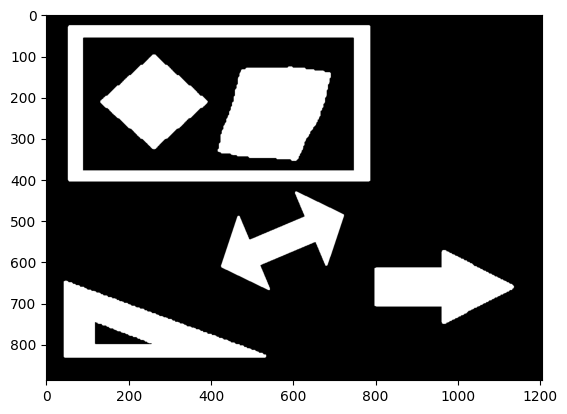

In [90]:
binary_image=READ_BINARY('nested-shapes.png', 240)
SHOW_IMAGE(binary_image)

In [ ]:
canny_img = cv2.Canny(gray_image,100,200)
SHOW_IMAGE(canny_img)

## Иерархия контуров

Вектор иерархии i-го контура состоит из 4-х элементов:

- hierarchy[i][0] - следующий контур на том же иерархическом уровне;
- hierarchy[i][1] - предыдущий контур на том же иерархическом уровне;
- hierarchy[i][2] - первый дочерний контур
- hierarchy[i][3] - родительский контур

Если какой либо индекс не существует, то его индекс будет -1

In [91]:
contours, hierarcy = cv2.findContours(binary_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [93]:
hierarcy

array([[[ 2, -1,  1, -1],
        [-1, -1, -1,  0],
        [ 3,  0, -1, -1],
        [ 4,  2, -1, -1],
        [-1,  3,  5, -1],
        [-1, -1,  6,  4],
        [ 7, -1, -1,  5],
        [-1,  6, -1,  5]]], dtype=int32)

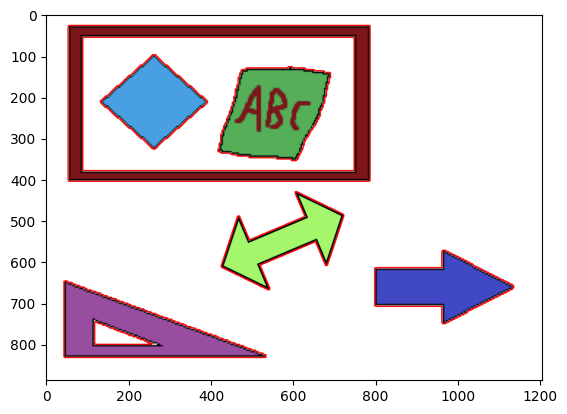

In [95]:
rgb_copy=rgb_image.copy()

# Аргументы:
# - 1. картинка, на которой будет рисовать контуры
# - 2. массив с координатами контуров
# - 3. индекс контура из contours, который мы хотим рисовать. -1 означает отрисовку всех контуров из массива
# - 4. цвет
# - 5. толщина
cv2.drawContours(rgb_copy,contours,-1,(255,0,0),2)
SHOW_IMAGE(rgb_copy)

## Полином из контура

In [187]:
# БОльший эпсилон - меньшая точность
def Approximating(contour,epsilon=.2):
    # Периметр контура
    length=cv2.arcLength(contour,True)
    # Аппроксимирует контурную форму к форме с меньшим количеством вершин
    # в зависимости от указанной точности. Это реализация алгоритма Рамера — Дугласа — Пекера.
    approx=cv2.approxPolyDP(contour,epsilon*length,True)

    # Альтернатива - аппроксимация выпуклой оболочкой с заданным количеством сторон
    # К сожалению, пока не работает в старых версиях opencv
    #approx = cv2.approxPolyN(contour, 4)
    return approx

In [153]:
approx=Approximating(contours[2], 0.05)


[[1145  661]
 [ 969  751]
 [ 621  661]
 [ 970  570]]


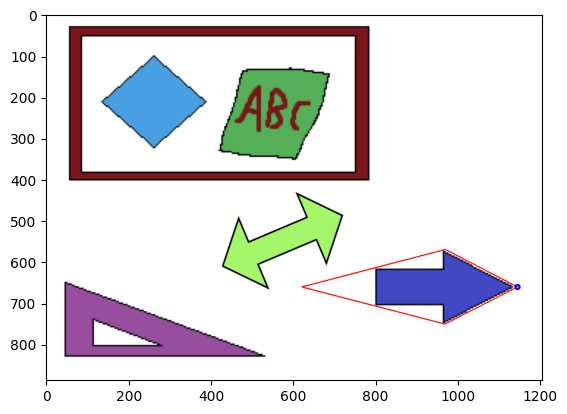

In [155]:
rgb_copy=rgb_image.copy()
cv2.drawContours(rgb_copy,[approx],-1,(255,0,0),2)
x,y,w,h = cv2.boundingRect(contours[2])

# Рисуем углы
for point in approx:
    print(point)
    x = point[0][0]
    y = point[0][1]
    rgb_copy = cv2.circle(rgb_copy, (x,y), radius=5, color=(0, 0, 255), thickness=3)

SHOW_IMAGE(rgb_copy)

In [165]:
src_point = approx[0].astype('float32')
src_point

array([[1145.,  661.],
       [ 969.,  751.],
       [ 621.,  661.],
       [ 970.,  570.]], dtype=float32)

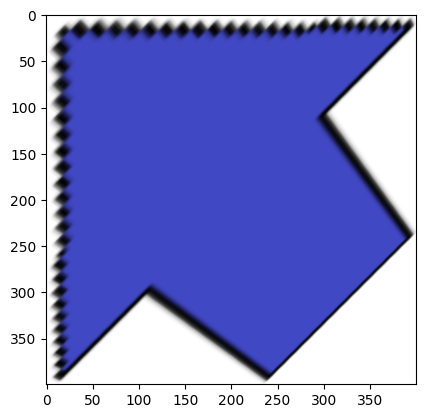

In [171]:
import numpy as np

rgb_copy=rgb_image.copy()
dst = np.array([[0,0], [200,0], [200,200], [0,200]],  dtype = "float32") * 2
M = cv2.getPerspectiveTransform(src_point, dst)

warped = cv2.warpPerspective(rgb_copy, M, (200*2, 200*2))
SHOW_IMAGE(warped)

In [144]:
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them individually
    pts = pts.reshape(4, 2)
    def order_points(pts):
        rect = np.zeros((4, 2), dtype = "float32")
        s = pts.sum(axis = 1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]
        diff = np.diff(pts, axis = 1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]
        return rect

    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    print(maxWidth, maxHeight)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    # return the warped image
    return warped

524 0


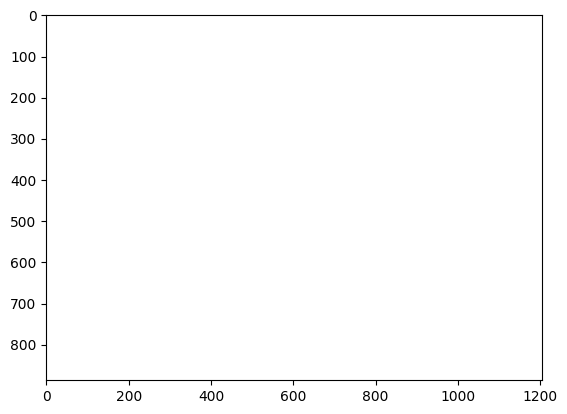

In [145]:
warped = four_point_transform(rgb_image, approx)
SHOW_IMAGE(warped)

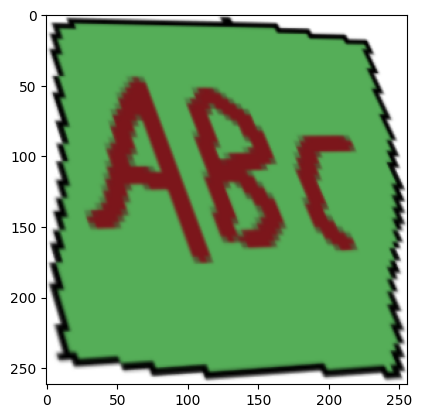

In [132]:
warped = four_point_transform(rgb_image, approx)
SHOW_IMAGE(warped)

## Выпуклая оболочка

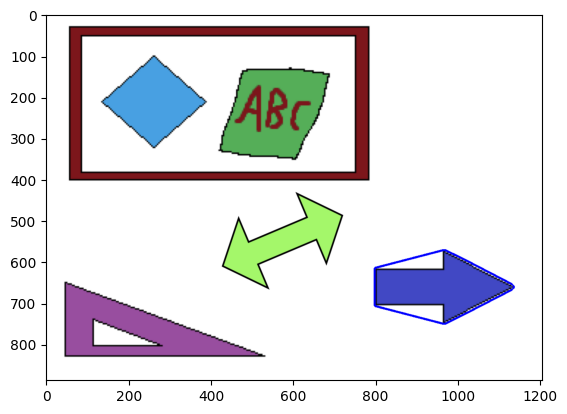

In [172]:
rgb_copy=rgb_image.copy()
hull = cv2.convexHull(contours[2])
cv2.drawContours(rgb_copy,[hull],-1,(0,0,255),3)
SHOW_IMAGE(rgb_copy)

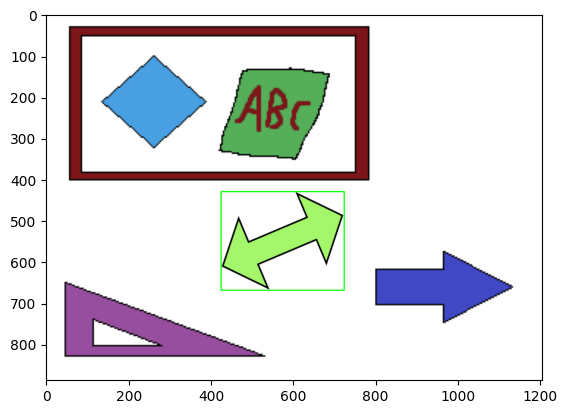

In [173]:
rgb_copy=rgb_image.copy()
x,y,w,h = cv2.boundingRect(contours[3])
cv2.rectangle(rgb_copy,(x,y),(x+w,y+h),(0,255,0),2)
SHOW_IMAGE(rgb_copy)

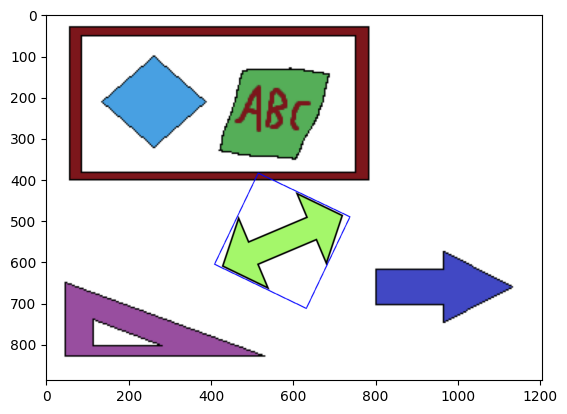

In [174]:
import numpy as np

rgb_copy = rgb_image.copy()
rect = cv2.minAreaRect(contours[3])
box = cv2.boxPoints(rect)
box = np.array(box).astype(int)
cv2.drawContours(rgb_copy,[box],0,(0,0,255),2)
SHOW_IMAGE(rgb_copy)

247 246


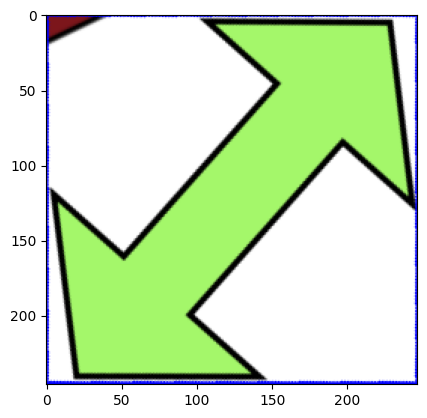

In [175]:
warped = four_point_transform(rgb_copy, box)
SHOW_IMAGE(warped)

In [178]:
box_ = box.astype("float32")

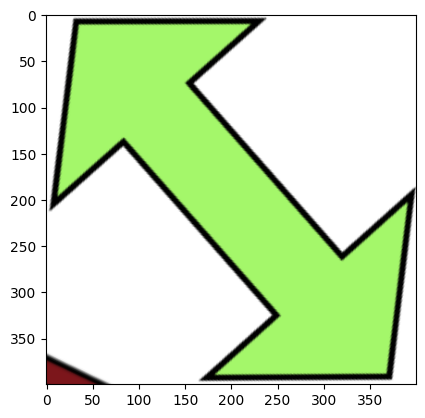

In [181]:
import numpy as np

rgb_copy=rgb_image.copy()
dst = np.array([[0,0],[0,200], [200,200], [200,0]],  dtype = "float32") * 2
M = cv2.getPerspectiveTransform(box_, dst)

warped = cv2.warpPerspective(rgb_copy, M, (200*2, 200*2))
SHOW_IMAGE(rgb_copy)

(400, 400, 3)


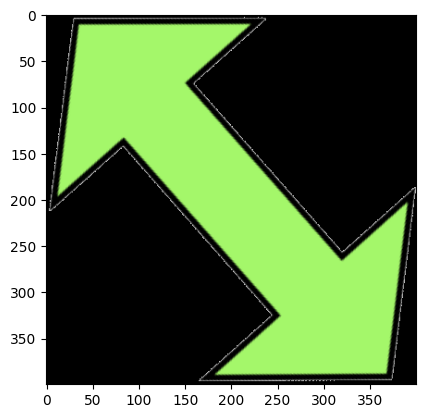

In [214]:
_,warped_bin = cv2.threshold(cv2.cvtColor(warped,cv2.COLOR_BGR2GRAY),200,255,cv2.THRESH_BINARY_INV)

contours_ , _ = cv2.findContours(warped_bin,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

warped_copy = warped.copy()
print(warped_copy.shape)
for i in range(warped_copy.shape[0]):
  for j in range(warped_copy.shape[1]):
    dist = cv2.pointPolygonTest(cnt,point,False)
    if cv2.pointPolygonTest(contours_[1],(j,i), False) == -1:
      warped_copy[i][j] = (0,0,0)

SHOW_IMAGE(warped_copy)


## Сортировка контуров по площади

In [182]:
areas = [cv2.contourArea(cnt) for cnt in contours]
sorted_contours = sorted(zip(areas, contours), reverse=True)

Index= 0, Area = 277436.0


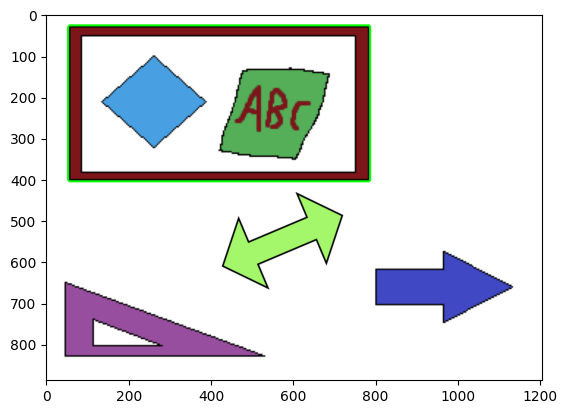

Index= 1, Area = 212852.0


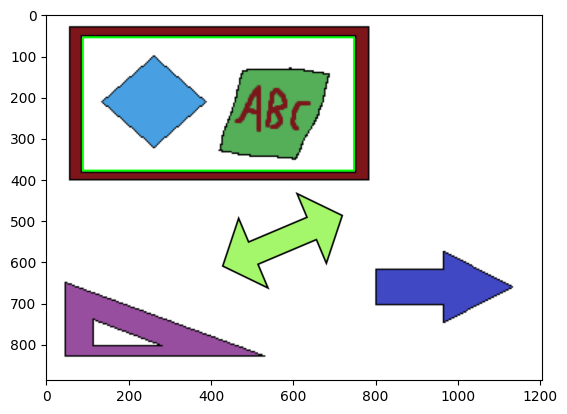

Index= 2, Area = 47600.5


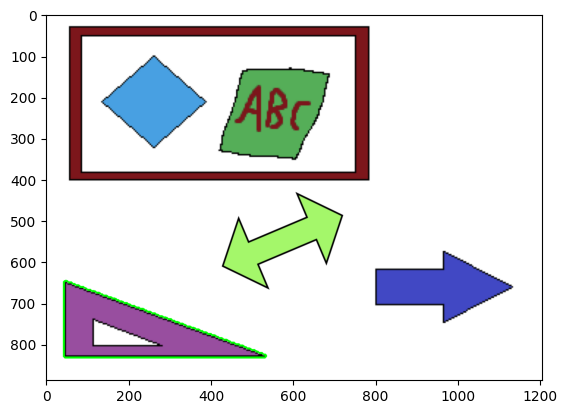

Index= 3, Area = 46377.0


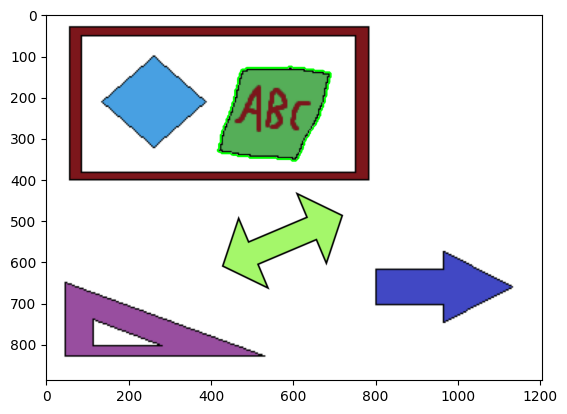

Index= 4, Area = 32082.0


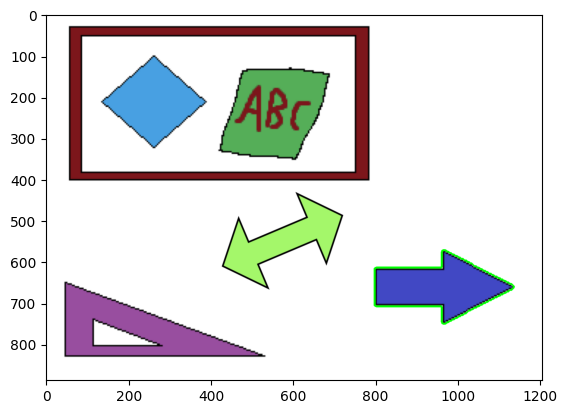

Index= 5, Area = 30431.5


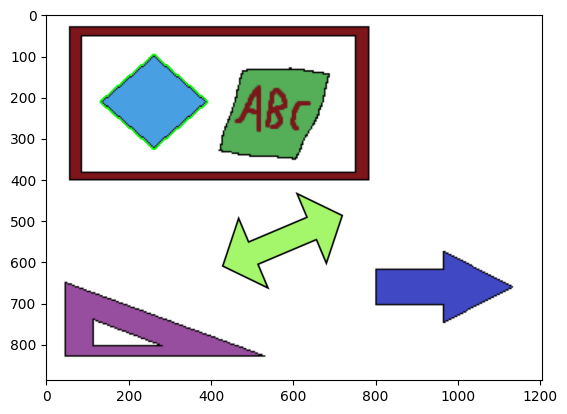

Index= 6, Area = 27847.0


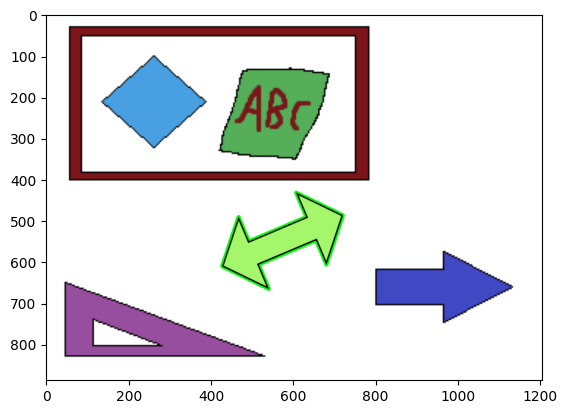

Index= 7, Area = 3912.5


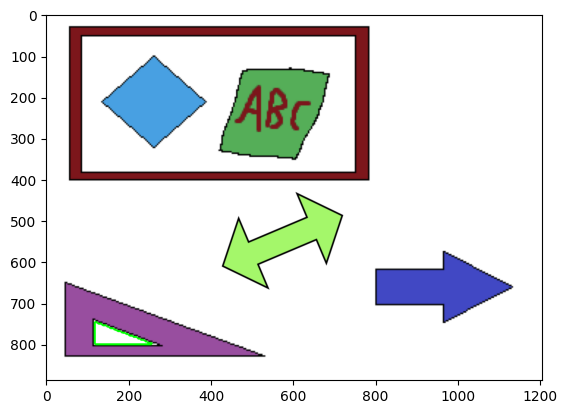

In [183]:
for cnt in sorted_contours:
    rgb_copy = rgb_image.copy()
    area, contour = cnt
    print(f"Index= {sorted_contours.index(cnt)}, Area = {area}")
    cv2.drawContours(rgb_copy,[contour],0,(0,255,0),3)
    SHOW_IMAGE(rgb_copy)


## Проверка принадлежности точки к контуру

1.0


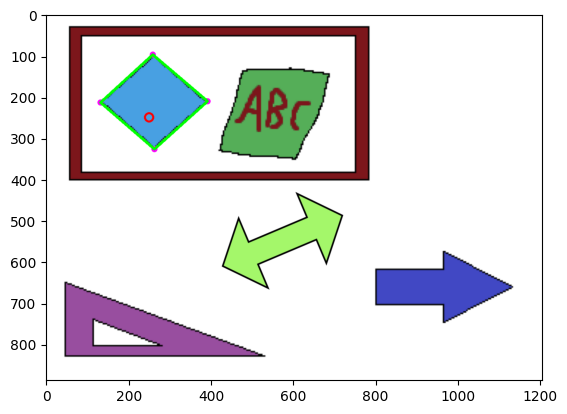

In [190]:
rgb_copy=rgb_image.copy()

point = (250,250)
cnt = sorted_contours[5][1]

# Уменьшение количества углов
cnt = Approximating(cnt, 0.02)

# Рисуем углы
for corn in cnt:
    x = corn[0][0]
    y = corn[0][1]
    rgb_copy = cv2.circle(rgb_copy, (x,y), radius=5, color=(255, 0, 255), thickness=3)


dist = cv2.pointPolygonTest(cnt,point,False)
print(dist)

rgb_copy = cv2.circle(rgb_copy, point, radius=10, color=(255, 0, 0), thickness=3)
cv2.drawContours(rgb_copy,[cnt],-1,(0,255,0),5)


SHOW_IMAGE(rgb_copy)

In [199]:
cnt[cnt[:,:, 0].argmin()]

array([[425, 609]], dtype=int32)

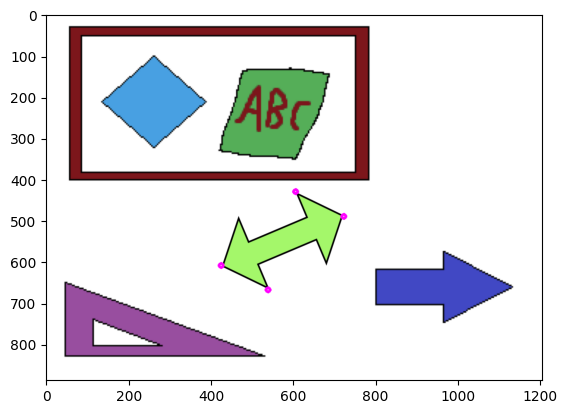

In [193]:
rgb_copy=rgb_image.copy()

cnt = sorted_contours[6][1]
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

rgb_copy = cv2.circle(rgb_copy, leftmost, radius=5, color=(255, 0, 255), thickness=5)
rgb_copy = cv2.circle(rgb_copy, rightmost, radius=5, color=(255, 0, 255), thickness=5)
rgb_copy = cv2.circle(rgb_copy, topmost, radius=5, color=(255, 0, 255), thickness=5)
rgb_copy = cv2.circle(rgb_copy, bottommost, radius=5, color=(255, 0, 255), thickness=5)
SHOW_IMAGE(rgb_copy)

Источники:

1) [Туториал](https://www.kaggle.com/code/ahmedashrafahmed/findcontours-four-point-transform)

2) [Документация OpenCV](https://docs.opencv.org/4.x/d3/d05/tutorial_py_table_of_contents_contours.html)